## **About Dataset**

Customer behavior and booking possibilities have been radically changed by online hotel reservation channels. Cancellations or no-shows cause a significant number of hotel reservations to be canceled. Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. In many cases, this is made easier by the possibility of doing so free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.

As a Data Scientist, your job is to build a Machine Learning model to help the Hotel Owners better understand if the customer is going to honor the reservation or cancel it ?

## Dataset Description
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below
* **Booking_ID**: unique identifier of each booking
* **No of adults**: Number of adults
* **No of children**: Number of Children
* **noofweekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **noofweek_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **typeofmeal_plan**: Type of meal plan booked by the customer:
* **requiredcarparking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)
* **roomtypereserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time**: Number of days between the date of booking and the arrival date
* **arrival_year**: Year of arrival date
* **arrival_month**: Month of arrival date
* **arrival_date**: Date of the month
* **Market segment type**: Market segment designation.
* **repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)
* **noofprevious_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking
* **noofpreviousbookingsnot_canceled**: Number of previous bookings not canceled by the customer prior to the current booking
* **avgpriceper_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **noofspecial_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

In [1]:
!pip install keras-tuner
!pip install robustats

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

# tf and Keras
import tensorflow as tf
import keras.api._v2.keras as keras
from keras.api._v2.keras.preprocessing.text import Tokenizer
from keras.api._v2.keras.utils import pad_sequences
import keras.api._v2.keras.models as models
import keras.api._v2.keras.layers as layers
import keras.api._v2.keras.losses as losses
import keras.api._v2.keras.activations as activations
import keras.api._v2.keras.optimizers as optimizers
import keras.api._v2.keras.metrics as metrics

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e7/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e7/test.csv')
origi_df = pd.read_csv('/kaggle/input/reservation-cancellation-prediction/train__dataset.csv')

In [4]:
train_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [7]:
train_df = pd.concat([train_df,origi_df]).reset_index(drop = True)
train_df.drop(columns = ['id'],inplace = True)

In [8]:
train_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000,60237.000000
mean,1.898451,0.130983,0.862493,2.341086,0.263061,0.027176,0.401182,98.314591,2017.845577,7.545130,15.830038,0.751897,0.027956,0.020536,0.168435,104.238935,0.585521,0.372628
std,0.523373,0.438391,0.882668,1.429660,0.601555,0.162597,0.816168,83.210861,0.361357,2.907078,8.854501,0.638291,0.164849,0.339763,1.726747,36.648888,0.779224,0.483508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,81.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,150.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,122.400000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


# EDA

In [9]:
features = train_df.drop(columns = ['booking_status'])
target = train_df['booking_status']

features.shape, target.shape

((60237, 17), (60237,))

<AxesSubplot:xlabel='booking_status', ylabel='count'>

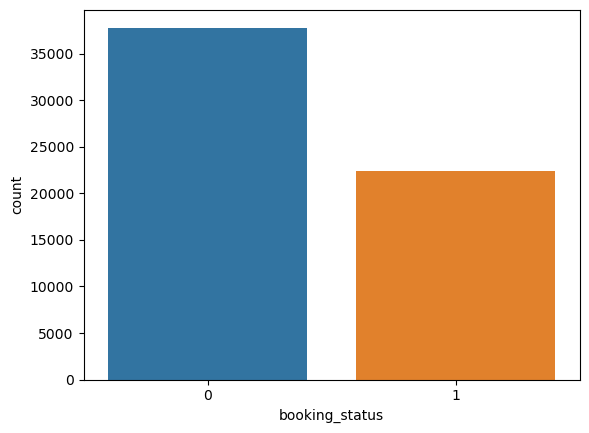

In [10]:
sns.countplot(x = target)

<AxesSubplot:>

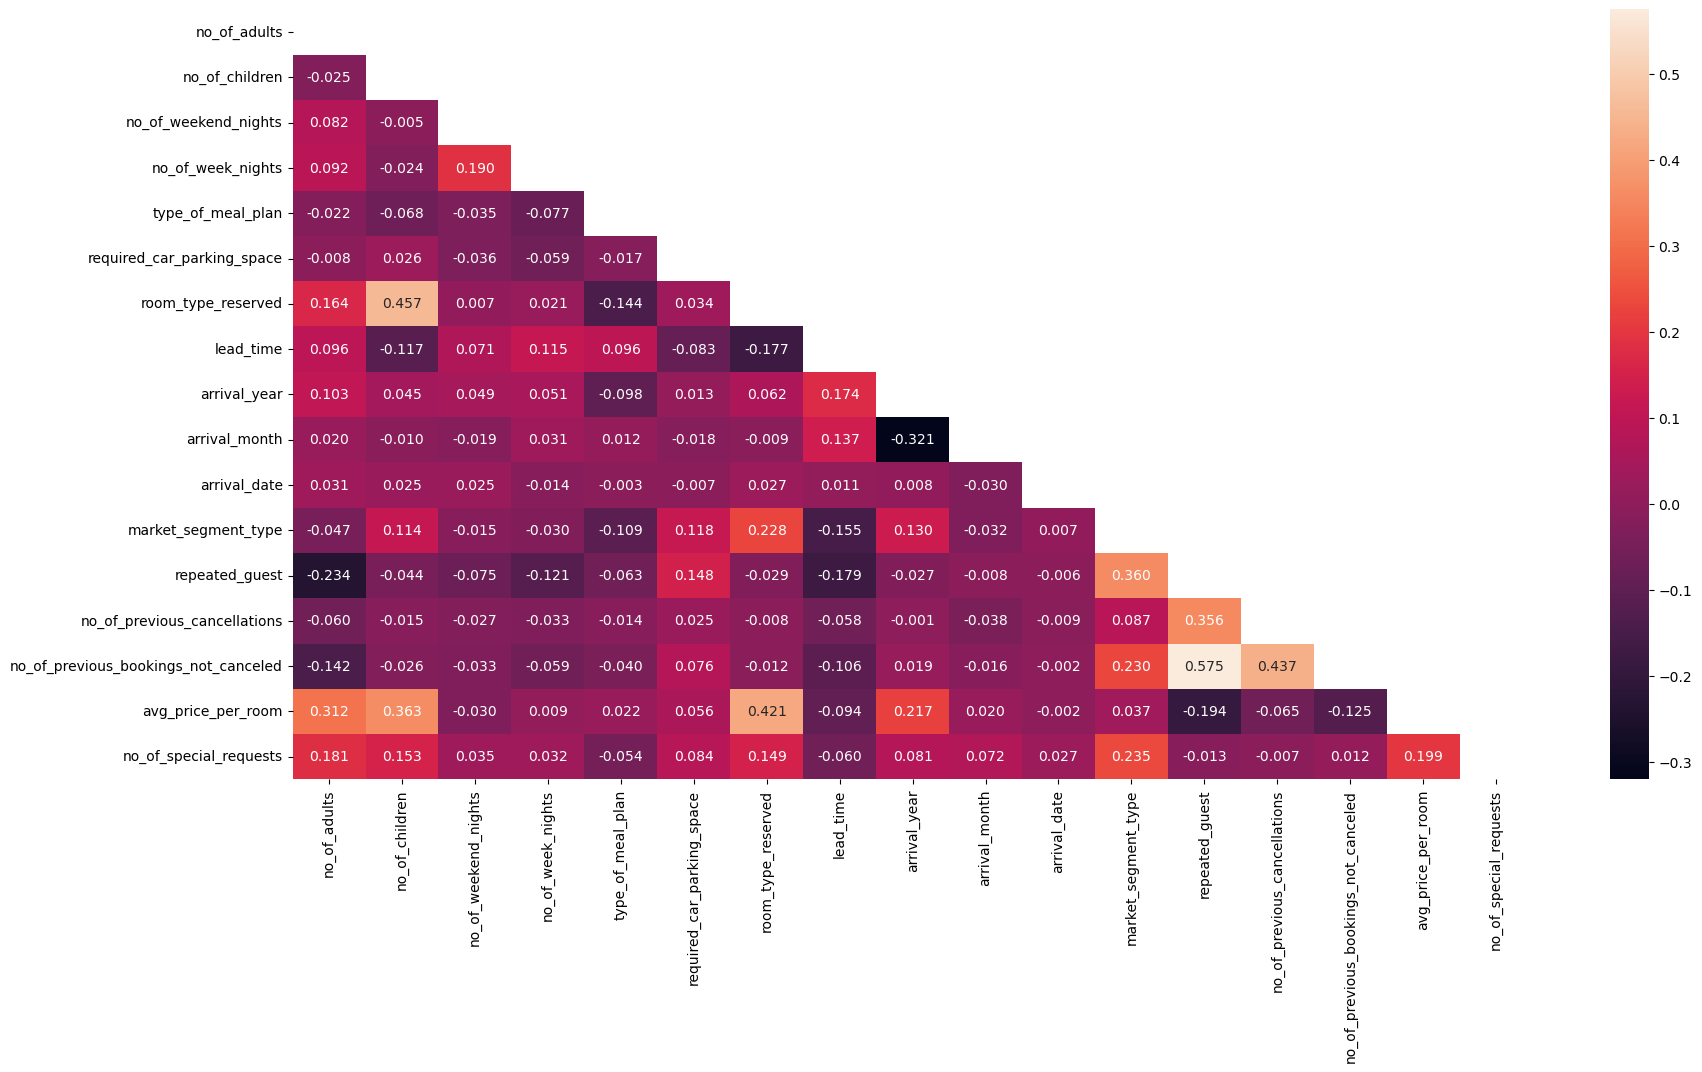

In [11]:
fig, ax = plt.subplots(figsize = [20,10])
mask = np.triu(features.corr())
sns.heatmap(features.corr(),fmt='.3f',annot = True, ax = ax, mask = mask)

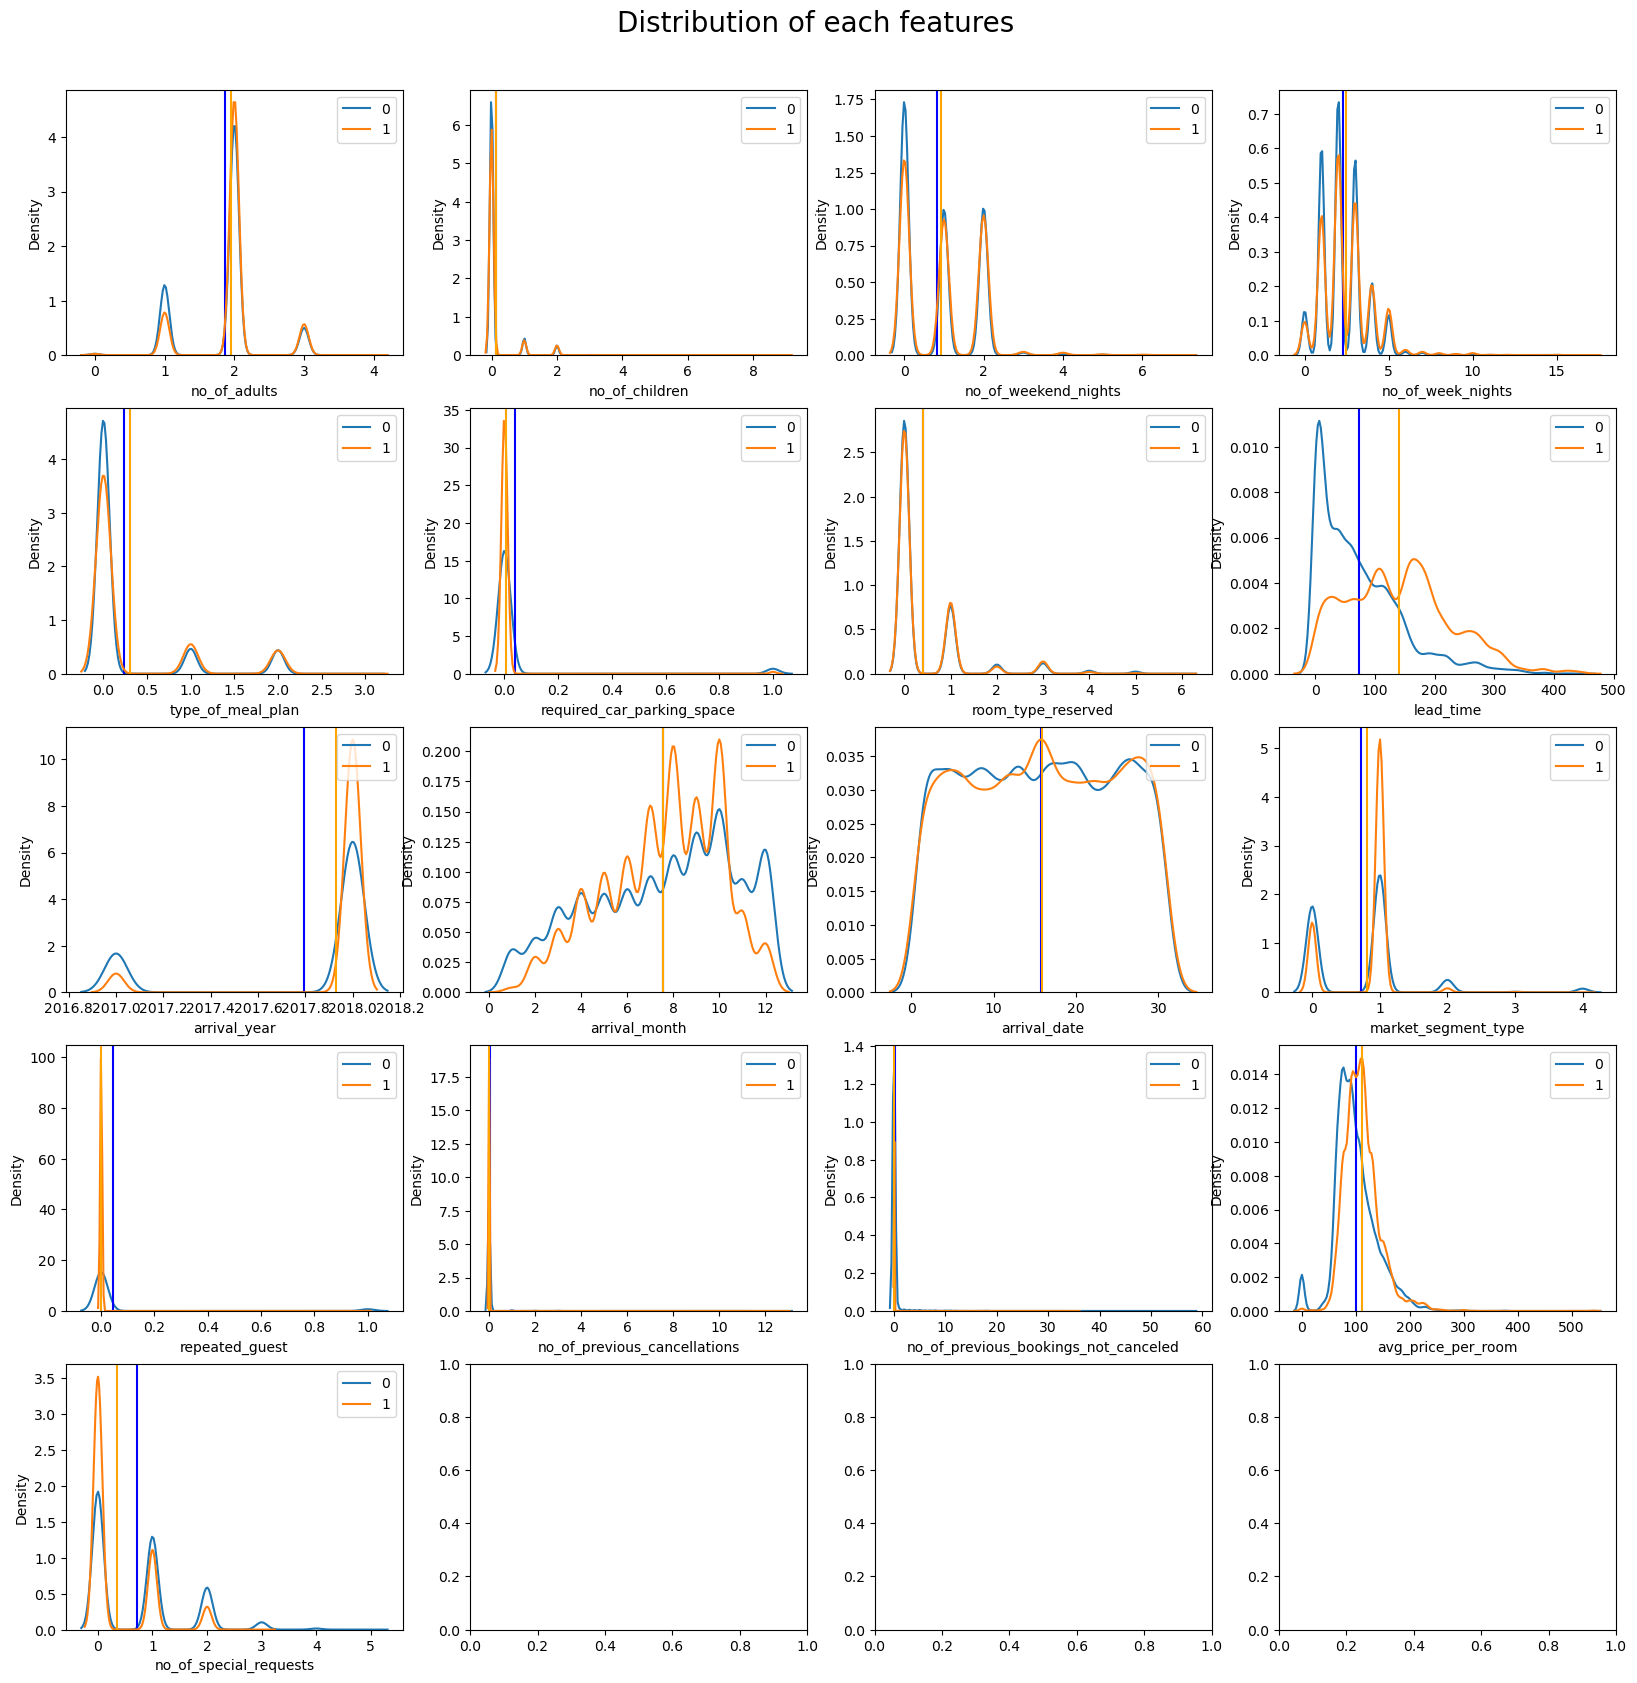

In [12]:
# Distributions of each class
def classes_kde(features, classes, focus_cols, grid, figsize = (20,20)):
    x,y = grid[1],grid[0]
    fig, axes = plt.subplots(y, x, figsize=figsize)
    for i,col in enumerate(focus_cols):
        clr = ['blue','orange']
        for c in classes:
            try:
                ax = axes[i//axes.shape[1],i%axes.shape[1]]
            except IndexError:
                ax = axes[i]
            kde = sns.kdeplot(data=train_df[target == c][col], label = c,\
                        ax = ax,fill = False, warn_singular=False)
            ax.legend(loc="upper right")

            # Draw mean straight lines
            mean = train_df[target == c][col].mean()
            ax.axvline(mean, color = clr[c])

    fig.suptitle('Distribution of each features',y = .92, fontsize=20)

classes_kde(features,target.unique(),features.columns,(5,4))

# Skewed features
Now there are two features that skewed on right hand side.
<br>
I decided to use adj boxplot algorithm to detect and remove them.


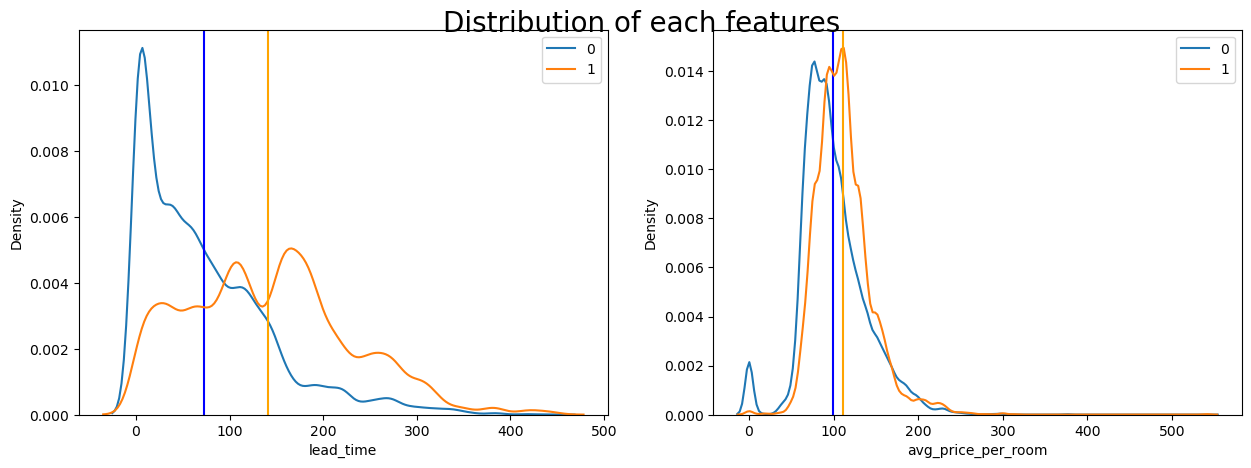

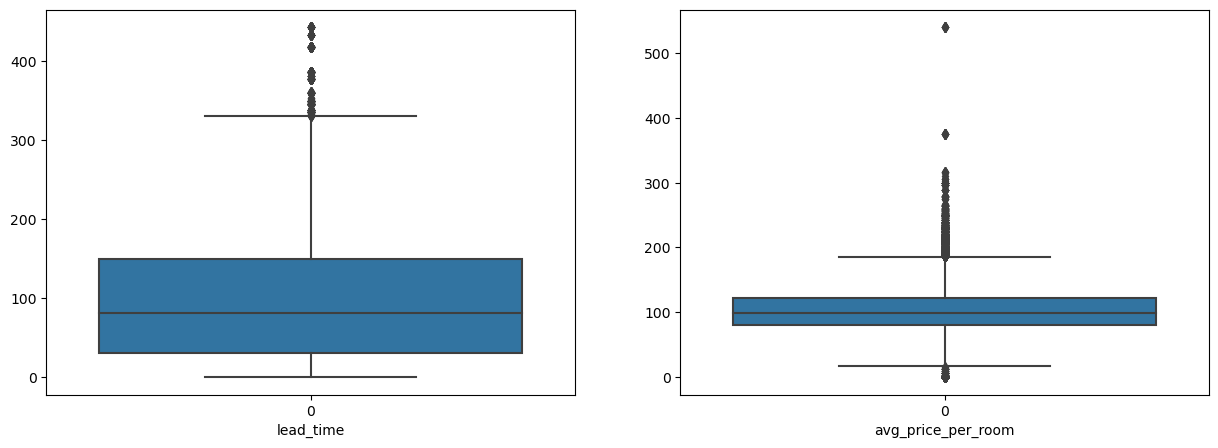

In [13]:
skewed = [
    'lead_time',
    'avg_price_per_room'
]

classes_kde(features,target.unique(),skewed[:2],(1,2),(15,5))

fig, axes = plt.subplots(1, 2, figsize=(15,5))
for i,c in enumerate(skewed):
    data = features[c]
    ax = axes[i]
    sns.boxplot(
        data = data, ax = ax
    )
    ax.set_xlabel(c)

In [14]:
for i in skewed:
    skewness = 3*((features[i].mean() - features[i].median()) / features[i].std())
    print(f'The skewness of {i} is: {skewness}')

The skewness of lead_time is: 0.6242426976928832
The skewness of avg_price_per_room is: 0.39201200181419005


In [15]:
!pip install robustats
from IPython.display import clear_output
clear_output()

# ADJ Boxplot

In [16]:
# Adj Boxplot define as 
# Q1 - 1.5 * exp^-4MC : Q3 + 1.5 * exp^3MC 
# Where MC is the medcouple of the feature and Q1 and Q3 are first and third quantile
import robustats

def adj_boxplot_outlier_romover(feature):
    feature = feature.copy()
    MC = robustats.medcouple(feature.to_list())
    Q1 = feature.quantile(.25)
    Q3 = feature.quantile(.75)
    l_bound = Q1 - (1.5*np.exp(-4*MC))
    up_bound = Q3 + (1.5*np.exp(3*MC))
    
    outlier = (feature < l_bound) | (feature > up_bound)
    # replace them with median
    feature[outlier] = feature.median()

    return feature

In [17]:
# # train
# outl_lead = adj_boxplot_outlier_romover(train_df['lead_time'])
# outl_avg_ppr = adj_boxplot_outlier_romover(train_df['avg_price_per_room'])
# train_df['lead_time'] = outl_lead
# train_df['avg_price_per_room'] = outl_avg_ppr

# #test
# outl_lead = adj_boxplot_outlier_romover(test_df['lead_time'])
# outl_avg_ppr = adj_boxplot_outlier_romover(test_df['avg_price_per_room'])
# test_df['lead_time'] = outl_lead
# test_df['avg_price_per_room'] = outl_avg_ppr

# Feature Engineering
Feature engneering from this amazing notebook: https://www.kaggle.com/code/sergiosaharovskiy/ps-s3e7-2023-eda-and-submission#Basic-Feature-Engineering Please, upvote it!

In [18]:
# date time modify
def fe(df):
    # Fix date anomalies (pd.to_datetime throws parsing error for some days, see anomalies section).
    df['year_month'] = pd.to_datetime(df[['arrival_year', 'arrival_month']].astype(str).sum(1), format='%Y%m')
    df.loc[df.arrival_date > df.year_month.dt.days_in_month, 'arrival_date'] = df.year_month.dt.days_in_month
    df.drop(columns='year_month', inplace=True)
    
     # Creates date features.
#     df['arrival_full_date'] = (df['arrival_year'].astype(str) 
#                                + '-' + df['arrival_month'].astype(str)
#                                + '-' + df['arrival_date'].astype(str))
#     df['arrival_full_date'] = pd.to_datetime(df.arrival_full_date)
#     df.drop(columns=['arrival_full_date'], inplace=True)
    
    # Interaction between the correlated features and also lead time.
    df['no_of_adults_div_price'] = df.no_of_adults / (df.avg_price_per_room + 1e-6)
    df['no_of_children_div_price'] = df.no_of_children / (df.avg_price_per_room + 1e-6)
    df['lead_time_div_price'] = df.lead_time / (df.avg_price_per_room + 1e-6)
    
    return df

train_df = fe(train_df)
test_df = fe(test_df)

In [19]:
cat = train_df.nunique() < 10
cat_cols = train_df.loc[:,cat.values].columns
cat_cols = cat_cols[:-1]
cat_cols = cat_cols.drop('arrival_year')
train_df[cat_cols], test_df[cat_cols] = train_df[cat_cols].astype('category'),test_df[cat_cols].astype('category')

In [20]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60237 entries, 0 to 60236
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          60237 non-null  category
 1   no_of_children                        60237 non-null  category
 2   no_of_weekend_nights                  60237 non-null  category
 3   no_of_week_nights                     60237 non-null  int64   
 4   type_of_meal_plan                     60237 non-null  category
 5   required_car_parking_space            60237 non-null  category
 6   room_type_reserved                    60237 non-null  category
 7   lead_time                             60237 non-null  int64   
 8   arrival_year                          60237 non-null  int64   
 9   arrival_month                         60237 non-null  int64   
 10  arrival_date                          60237 non-null  int64   
 11  ma

(None, None)

# Hypermodel Build with keras tuner

In [21]:
!pip install keras-tuner
clear_output()

In [22]:
X = train_df.drop(columns = ['booking_status'])
Y = train_df['booking_status']

X.shape, Y.shape

((60237, 20), (60237,))

In [23]:
import keras_tuner as kt

def hypermodel_build(hp):
    
    model = models.Sequential()
    model.add( keras.Input(shape = (X.shape[1],)) )
    model.add(layers.BatchNormalization())
    
    # Hidden layers tuning
    for i in range(hp.Choice('hidden_layers', values=[4])):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh",'sigmoid']),
            )
        )
        
        model.add(
            layers.Dropout(.2)
        )
    
    # Output layer
    model.add(
        layers.Dense(
            1, activation = 'sigmoid'
        )
    )
    
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    return model

# Random Search

In [24]:
tuner = kt.RandomSearch(
    hypermodel=hypermodel_build,
    objective="val_accuracy",
    max_trials=20,
    overwrite=True,
    directory="my_dir",
    project_name="PS_ss3_kt",
)

In [25]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
hidden_layers (Choice)
{'default': 4, 'conditions': [], 'values': [4], 'ordered': True}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


# ML Model

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 1336)

In [27]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
Y_train = tf.convert_to_tensor(Y_train)
Y_test = tf.convert_to_tensor(Y_test)

In [28]:
tuner.search(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test),verbose = 1)

Trial 20 Complete [00h 00m 38s]
val_accuracy: 0.8169986605644226

Best val_accuracy So Far: 0.8191235065460205
Total elapsed time: 00h 13m 21s


In [29]:
tuner.results_summary(num_trials=1)

Results summary
Results in my_dir/PS_ss3_kt
Showing 1 best trials
Trial summary
Hyperparameters:
hidden_layers: 4
units_0: 64
activation: relu
units_1: 320
units_2: 480
units_3: 224
lr: 0.00036642169846069463
Score: 0.8191235065460205


In [30]:
best_hpm = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hpm)

In [31]:
from dataclasses import dataclass,field

@dataclass
class FoldData:
    train_x: tf.Tensor = field()
    test_x: tf.Tensor = field()
    train_y: tf.Tensor = field()
    test_y: tf.Tensor = field()

class FoldManager:
    
    def extract_fold(self, fold_index:list , X, Y ):
        for train, test in fold_index:
            yield FoldData(
                train_x = tf.gather( X, train ),
                test_x = tf.gather( X, test ),
                train_y = tf.gather( Y, train ),
                test_y = tf.gather( Y, test ) 
            )
    
    # V V V
    
    def train_fold( self, batch_of_folds, ep, batch_size ):
        tf.keras.backend.clear_session()
        md_history = []
        for i,fold in enumerate(batch_of_folds):
            print(f'Fold: {i+1}')
            model.fit(
                fold.train_x,
                fold.train_y,
                epochs = ep,
                batch_size = batch_size,
                verbose = 2
            )
            
            print('Evaluating....')
            
            model.evaluate(
                fold.test_x,
                fold.test_y,
                batch_size = batch_size
            )

In [32]:
shf = StratifiedKFold(n_splits = 3,random_state = 1336, shuffle = True)
splitted = shf.split(X,Y)

fold = FoldManager()
extrc_fold = fold.extract_fold(splitted,X,Y)
fold.train_fold(extrc_fold, 50, batch_size = None)

Fold: 1
Epoch 1/50
1255/1255 - 6s - loss: 0.4918 - accuracy: 0.7640 - 6s/epoch - 5ms/step
Epoch 2/50
1255/1255 - 4s - loss: 0.4640 - accuracy: 0.7824 - 4s/epoch - 4ms/step
Epoch 3/50
1255/1255 - 4s - loss: 0.4595 - accuracy: 0.7880 - 4s/epoch - 3ms/step
Epoch 4/50
1255/1255 - 4s - loss: 0.4540 - accuracy: 0.7913 - 4s/epoch - 3ms/step
Epoch 5/50
1255/1255 - 5s - loss: 0.4520 - accuracy: 0.7898 - 5s/epoch - 4ms/step
Epoch 6/50
1255/1255 - 5s - loss: 0.4475 - accuracy: 0.7955 - 5s/epoch - 4ms/step
Epoch 7/50
1255/1255 - 5s - loss: 0.4460 - accuracy: 0.7946 - 5s/epoch - 4ms/step
Epoch 8/50
1255/1255 - 4s - loss: 0.4426 - accuracy: 0.7969 - 4s/epoch - 3ms/step
Epoch 9/50
1255/1255 - 4s - loss: 0.4415 - accuracy: 0.7965 - 4s/epoch - 3ms/step
Epoch 10/50
1255/1255 - 4s - loss: 0.4414 - accuracy: 0.7968 - 4s/epoch - 3ms/step
Epoch 11/50
1255/1255 - 4s - loss: 0.4394 - accuracy: 0.8003 - 4s/epoch - 3ms/step
Epoch 12/50
1255/1255 - 4s - loss: 0.4376 - accuracy: 0.8003 - 4s/epoch - 4ms/step
Epoch

In [33]:
pred = model.predict(test_df.drop(columns = ['id']))

878/878 [==============================] - 2s 2ms/step


In [34]:
#create submission file
sub = pd.read_csv('/kaggle/input/playground-series-s3e7/sample_submission.csv')
sub['booking_status'] = pred
sub.head()

,id,booking_status
0,42100,0.154346
1,42101,0.050754
2,42102,0.388126
3,42103,0.101321
4,42104,0.439938


In [35]:
sub.to_csv('./submission.csv', index=False)